<h1>1 Exploratory Data Analysis (EDA)</h1>

<h2>1.1 Dataset overview</h2>

<p>This dataset contains shipment and customer records from an international e-commerce company that sells electronic products</p>

<p>
ID – Unique identifier of the order

Warehouse_block – Warehouse from which the product was shipped

Mode_of_Shipment – Shipment method (Ship, Flight, Road)

Customer_care_calls – Number of customer service calls made for the order

Customer_rating – Customer rating of the service (1–5)

Cost_of_the_Product – Price of the product

Prior_purchases – Number of previous purchases by the customer

Product_importance – Importance level of the product (Low, Medium, High)

Gender – Gender of the customer

Discount_offered – Discount applied to the product

Weight_in_gms – Weight of the product in grams

Reached.on.Time_Y.N – Indicates whether the order was delivered on time (0 = Yes, 1 = No)
</p>

<p>The goal of this project is to apply unsupervised learning techniques to identify meaningful clusters of customers and shipment profiles based on their shared characteristics.</p>

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("../data/Train.csv")

df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [3]:
df.shape

(10999, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


In [5]:
df.describe()

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,10999.00000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,5500.00000,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729,0.596691
std,3175.28214,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251,0.490584
min,1.00000,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,2750.50000,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000,0.000000
50%,5500.00000,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000,1.000000
75%,8249.50000,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000,1.000000
max,10999.00000,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000


<h2>1.2 Data types & missing values</h2>

In [6]:
df.dtypes

ID                      int64
Warehouse_block        object
Mode_of_Shipment       object
Customer_care_calls     int64
Customer_rating         int64
Cost_of_the_Product     int64
Prior_purchases         int64
Product_importance     object
Gender                 object
Discount_offered        int64
Weight_in_gms           int64
Reached.on.Time_Y.N     int64
dtype: object

<p>Some of the features are numerical. Those features are: ID, Customer_care_calls, Customer_rating, Cost_of_the_Product, Prior_purchases, Discount_offered, Weight_in_gms.</p>
<p>While other features, such as: Warehouse_block, Mode_of_Shipment, Product_importance and Gender are Categorical</p>
<p>Reached.on.Time_Y.N (0 or 1) is int64 but it is actually a binary Categorical feature</p>


In [7]:
df.isnull().sum()

ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64

<p>The dataset does not contain missing values, which simplifies preprocessing.</P>

<h2>1.3 Feature distribution</h2>

In [13]:
numerical_features = df.drop(
    columns=[
        "ID",
        "Warehouse_block",
        "Mode_of_Shipment",
        "Product_importance",
        "Gender",
        "Reached.on.Time_Y.N"
    ]
).columns

categorical_features = [
    "Warehouse_block",
    "Mode_of_Shipment",
    "Product_importance",
    "Gender",
    "Reached.on.Time_Y.N"
]

numerical_features

Index(['Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product',
       'Prior_purchases', 'Discount_offered', 'Weight_in_gms'],
      dtype='object')

In [14]:
summary = []

for col in numerical_features:
    summary.append({
        "Feature": col,
        "Mean": df[col].mean(),
        "Median": df[col].median(),
        "Mode": df[col].mode().iloc[0]
    })

summary_df = pd.DataFrame(summary)
summary_df

,Feature,Mean,Median,Mode
0,Customer_care_calls,4.054459,4.0,4
1,Customer_rating,2.990545,3.0,3
2,Cost_of_the_Product,210.196836,214.0,245
3,Prior_purchases,3.567597,3.0,3
4,Discount_offered,13.373216,7.0,10
5,Weight_in_gms,3634.016729,4149.0,4883


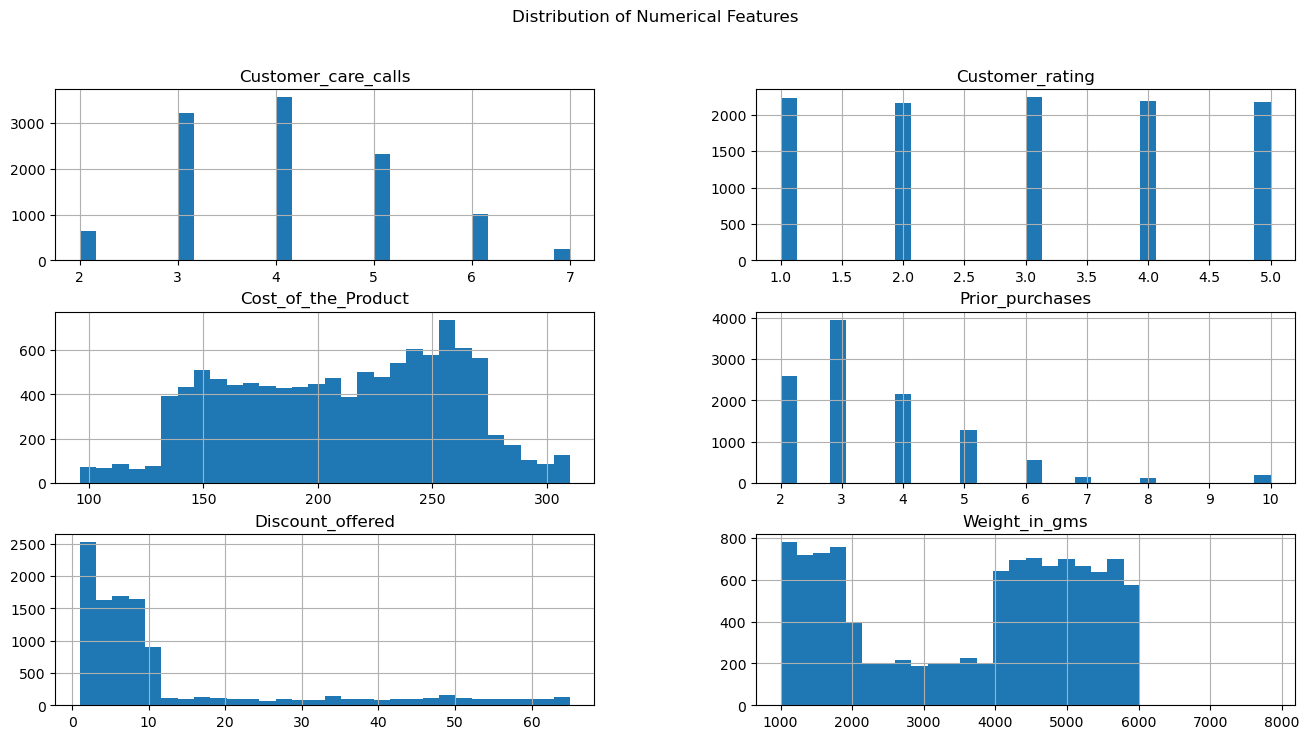

In [15]:
import matplotlib.pyplot as plt

df[numerical_features].hist(figsize=(16, 8), bins=30)
plt.suptitle("Distribution of Numerical Features")
plt.show()